# Input data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# MEF
MEF = pd.read_csv("./source_data/CA_LR_24h.csv",index_col = 0)['MEF'].tolist()

In [3]:
# based load of a workplace building with 30 floors from 2018 to 2020
BL_workplace = pd.read_csv("./result/base_load/BL_workplace_annual_avg.csv",index_col=[0,1])
BL_workplace_2019 = BL_workplace.loc[BL_workplace.index.get_level_values(0) == 2019]

In [5]:
num_charger = [90,250,370,450]
date1 = '53'
date2 = '58'
p_tb_cc_w1600 = pd.DataFrame(index = range(0,96),columns = num_charger)
p_tb_uc_w1600 = pd.DataFrame(index = range(0,96),columns = num_charger)
p_tb_demand_w1600 = pd.DataFrame(index = range(0,96),columns = num_charger)
pareto_w1600 = pd.DataFrame(index = num_charger,columns = ['Em_uc_kg/kWh','Em_cc_kg/kWh','Em_reduce_%','loadvar_uc','loadvar_cc','loadvar_reduce_%','satisfied_energy_%','satisfied_energy_uc_%','Em_reduce_kg'])

i = num_charger[0]
p_tb_cc_w1600[i] = pd.read_csv(f"./result/EV_charging_load_oncc/workplace/1600KVA/p_tb_cc_w1600_{i}_week.csv",index_col = 0)[date1].tolist()
p_tb_uc_w1600[i] = pd.read_csv(f"./result/EV_charging_load_uc/workplace/1600KVA/p_tb_uc_w1600_{i}.csv",index_col = 0)[date1].tolist()
p_tb_demand_w1600[i] = pd.read_csv(f"./result/EV_charging_load_demand/workplace/1600KVA/p_tb_demand_w1600_{i}.csv",index_col = 0)[date1].tolist()
pareto_w1600.loc[i] = pd.read_csv(f"./result/pareto_oncc/workplace/1600KVA/pareto_w1600_{i}_week.csv",index_col = 0).loc[int(date1)].tolist()
    
for i in num_charger[1:]:
    p_tb_cc_w1600[i] = pd.read_csv(f"./result/EV_charging_load_oncc/workplace/1600KVA/p_tb_cc_w1600_{i}_week.csv",index_col = 0)[date2].tolist()
    p_tb_uc_w1600[i] = pd.read_csv(f"./result/EV_charging_load_uc/workplace/1600KVA/p_tb_uc_w1600_{i}.csv",index_col = 0)[date2].tolist()
    p_tb_demand_w1600[i] = pd.read_csv(f"./result/EV_charging_load_demand/workplace/1600KVA/p_tb_demand_w1600_{i}.csv",index_col = 0)[date2].tolist()
    pareto_w1600.loc[i] = pd.read_csv(f"./result/pareto_oncc/workplace/1600KVA/pareto_w1600_{i}_week.csv",index_col = 0).loc[int(date2)].tolist()

# Result

In [7]:
# Define a function for your plot
def plot_load(ax, based_load_data, MEF_data, power_demand_limit, trafo_capacity,
              charging_power_uc, charging_power_cc, charging_power_demand,
              Em_reduce, Energy_satisfied, num_charger, seq, ylim_lb, ylim_ub):
    """
    Param:
    based_load_data: list
    MEF_data: list
    power_demand_limit: float
    trafo_capacity: float
    charging_power_uc: list
    charging_power_cc: list
    charging_power_demand: list
    loadvar_reduce: float
    Em_reduce: float
    
    Return:
    a subplot
    """
    x = [i for i in range(0,96)]
    y1 = based_load_data['total'].tolist()
    y2 = [a + b for a, b in zip(based_load_data['total'].tolist(), charging_power_cc)]
    y3 = [a + b for a, b in zip(based_load_data['total'].tolist(), charging_power_uc)]
    y4 = [a + b for a, b in zip(based_load_data['total'].tolist(), charging_power_demand)]
    y5 = MEF_data

    # Plot line for the first axis
    ax.plot(x, y1, label='Existing electrical load')
    ax.plot(x, y2, label='EV charging load + Existing electrical load (ONCC)')
    ax.plot(x, y4, label='EV charging demand + Existing electrical load')
    ax.plot(x, y3, label='EV charging load + Existing electrical load (UC)')
    ax.axhline(y = power_demand_limit, linestyle='--', label="Electrical load limit")
#     ax.set_xlabel(f'Time (h) \n\nCO$_2$ emissions mitigation per kWh: {Em_reduce:.3f}% \nPower supply to demand: {Energy_satisfied:.3f}%')
    ax.set_xlabel('Time (h)')
    ax.set_ylabel('Power (kW)')
    ax.set_xticks(ticks=[0, 4*4+1, 8*4+1, 12*4+1, 16*4+1, 20*4+1], labels=["0", "4", "8", "12", "16", "20"])
    ax.set_ylim(ylim_lb,ylim_ub)
    
    # Get legend handles and labels for the first axe
    if num_charger == 450:
        handles1, labels1 = ax.get_legend_handles_labels()

    # Create the second axis
    ax_twin = ax.twinx()
    ax_twin.plot(x, y5, color='k', linestyle=":", label='MEF')
    ax_twin.set_ylabel('MEF (g CO$_2$/kWh)')  # Set y-axis label for the second axis

    if num_charger == 10:
        ax.set_title(f'{trafo_capacity}\n\n{seq} Number of chargers: {num_charger}')
    else:
        ax.set_title(f'{seq} {num_charger} charging piles')
    
    if num_charger == 450:
        # Get legend handles and labels for the second axe
        handles2, labels2 = ax_twin.get_legend_handles_labels()

        # Combine legends of both axes
        handles_combined = handles1 + handles2
        labels_combined = labels1 + labels2
#         ax.legend(handles_combined, labels_combined, loc="best")
        fig.legend(handles_combined, labels_combined, loc='upper center', bbox_to_anchor =(0.5, 0), ncol=2)

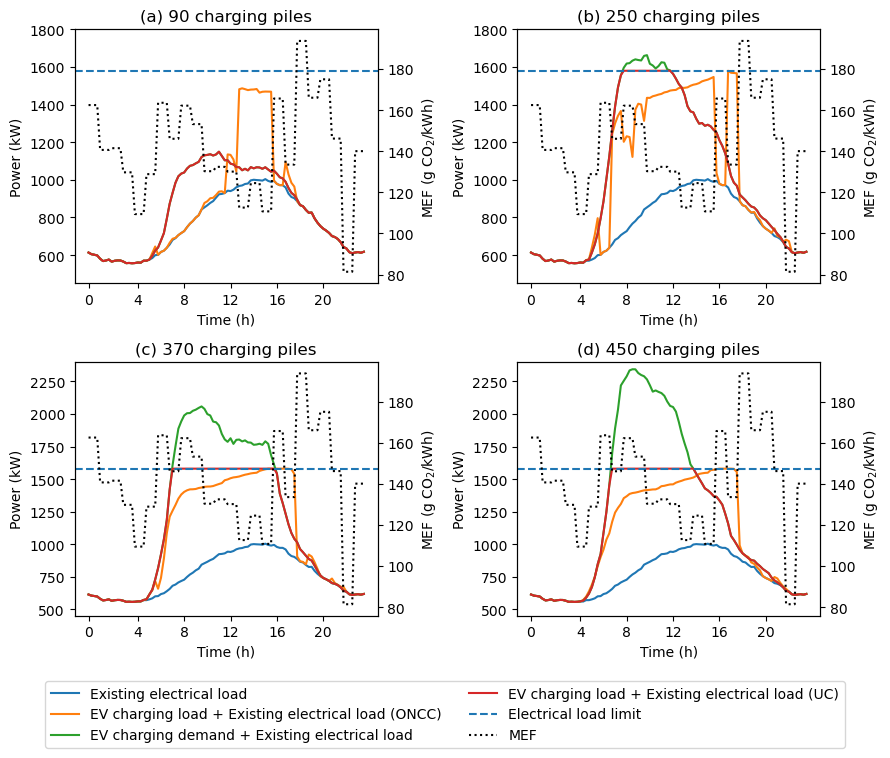

In [9]:
# Create a figure with one row and three column
n_row = 2
n_col = 2 
fig, axes = plt.subplots(nrows = n_row, ncols = n_col, figsize=(9, 6.8),sharey=False,tight_layout=True)

plot_load(
    ax = axes[0,0], based_load_data = BL_workplace_2019, MEF_data = MEF,
    power_demand_limit = 1580, trafo_capacity = 'Transformer capacity: 1600 KVA',
    charging_power_uc = p_tb_uc_w1600[num_charger[0]].tolist(), 
    charging_power_cc = p_tb_cc_w1600[num_charger[0]].tolist(),
    charging_power_demand = p_tb_demand_w1600[num_charger[0]].tolist(),
    Em_reduce = pareto_w1600.loc[num_charger[0],'Em_reduce_%'],
    Energy_satisfied = pareto_w1600.loc[num_charger[0],'satisfied_energy_%'],
    num_charger = num_charger[0],
    seq = '(a)', ylim_lb = 450, ylim_ub = 1800,
)

plot_load(
    ax = axes[0,1], based_load_data = BL_workplace_2019, MEF_data = MEF,
    power_demand_limit = 1580, trafo_capacity = 'Transformer capacity: 1600 KVA',
    charging_power_uc = p_tb_uc_w1600[num_charger[1]].tolist(), 
    charging_power_cc = p_tb_cc_w1600[num_charger[1]].tolist(),
    charging_power_demand = p_tb_demand_w1600[num_charger[1]].tolist(),
    Em_reduce = pareto_w1600.loc[num_charger[1],'Em_reduce_%'],
    Energy_satisfied = pareto_w1600.loc[num_charger[1],'satisfied_energy_%'],
    num_charger = num_charger[1],
    seq = '(b)', ylim_lb = 450, ylim_ub = 1800,
)

plot_load(
    ax = axes[1,0], based_load_data = BL_workplace_2019, MEF_data = MEF,
    power_demand_limit = 1580, trafo_capacity = 'Transformer capacity: 1600 KVA',
    charging_power_uc = p_tb_uc_w1600[num_charger[2]].tolist(), 
    charging_power_cc = p_tb_cc_w1600[num_charger[2]].tolist(),
    charging_power_demand = p_tb_demand_w1600[num_charger[2]].tolist(),
    Em_reduce = pareto_w1600.loc[num_charger[2],'Em_reduce_%'],
    Energy_satisfied = pareto_w1600.loc[num_charger[2],'satisfied_energy_%'],
    num_charger = num_charger[2],
    seq = '(c)', ylim_lb = 450, ylim_ub = 2400,
)

plot_load(
    ax = axes[1,1], based_load_data = BL_workplace_2019, MEF_data = MEF,
    power_demand_limit = 1580, trafo_capacity = 'Transformer capacity: 1600 KVA',
    charging_power_uc = p_tb_uc_w1600[num_charger[3]].tolist(), 
    charging_power_cc = p_tb_cc_w1600[num_charger[3]].tolist(),
    charging_power_demand = p_tb_demand_w1600[num_charger[3]].tolist(),
    Em_reduce = pareto_w1600.loc[num_charger[3],'Em_reduce_%'],
    Energy_satisfied = pareto_w1600.loc[num_charger[3],'satisfied_energy_%'],
    num_charger = num_charger[3],
    seq = '(d)', ylim_lb = 450, ylim_ub = 2400,
)

plt.savefig("./result/Figure/Load_profile.svg",bbox_inches='tight')
plt.show()